In [357]:
#Libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [358]:
# Data collection
dataset = pd.read_excel("../dataset/AI On-Campus Research Survey (Responses).xlsx", engine='openpyxl')

In [359]:
# Handling columns we don't need
dataset = dataset.drop(['Timestamp', 'What college are you in?'], axis = 1)

In [360]:
# Rename columns
dataset.rename(columns={
    'On a scale from 1 to 5, how would you rate your knowledge and understanding of Artificial Intelligence (AI)?': 'Knowledge_AI',
    'On a scale from 1 to 5, how often do you use Artificial Intelligence (AI) for personal use?': 'Personal_use_AI',
    'On a scale from 1 to 5, how often do you use Artificial Intelligence (AI) for school-related tasks?': 'School_use_AI',
    'On a scale from 1 to 5, how interested are you in pursuing a career in Artificial Intelligence?': 'Interest_AI_Career'
}, inplace=True)

In [361]:
# Top rows of the dataset 
dataset.head()

,Knowledge_AI,Personal_use_AI,School_use_AI,Interest_AI_Career,Do you know what Chat-GPT is?
0,5,5,5,5,Yes
1,4,3,4,4,Yes
2,3,3,5,1,No
3,4,3,5,2,Yes
4,5,2,1,5,Yes


In [362]:
# Data types
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Knowledge_AI                   258 non-null    int64 
 1   Personal_use_AI                258 non-null    int64 
 2   School_use_AI                  258 non-null    int64 
 3   Interest_AI_Career             258 non-null    int64 
 4   Do you know what Chat-GPT is?  258 non-null    object
dtypes: int64(4), object(1)
memory usage: 10.2+ KB


In [363]:
# Identifying null values
dataset.isnull().sum()

Knowledge_AI                     0
Personal_use_AI                  0
School_use_AI                    0
Interest_AI_Career               0
Do you know what Chat-GPT is?    0
dtype: int64

In [364]:
# Selecting features for outlier detection
outlier_features = dataset[['Knowledge_AI', 'Personal_use_AI', 'School_use_AI', 'Interest_AI_Career']]

# Standardize the data using Z-Score
scaler = StandardScaler()
standardized_features = scaler.fit_transform(outlier_features)

# Z-Score Outlier Detection
z_scores = pd.DataFrame(standardized_features, columns=outlier_features.columns)
outliers_zscore = z_scores[(z_scores.abs() > 3).any(axis=1)]

# Display the results
print("Z-Score Outliers:")
print(outliers_zscore)

Z-Score Outliers:
Empty DataFrame
Columns: [Knowledge_AI, Personal_use_AI, School_use_AI, Interest_AI_Career]
Index: []


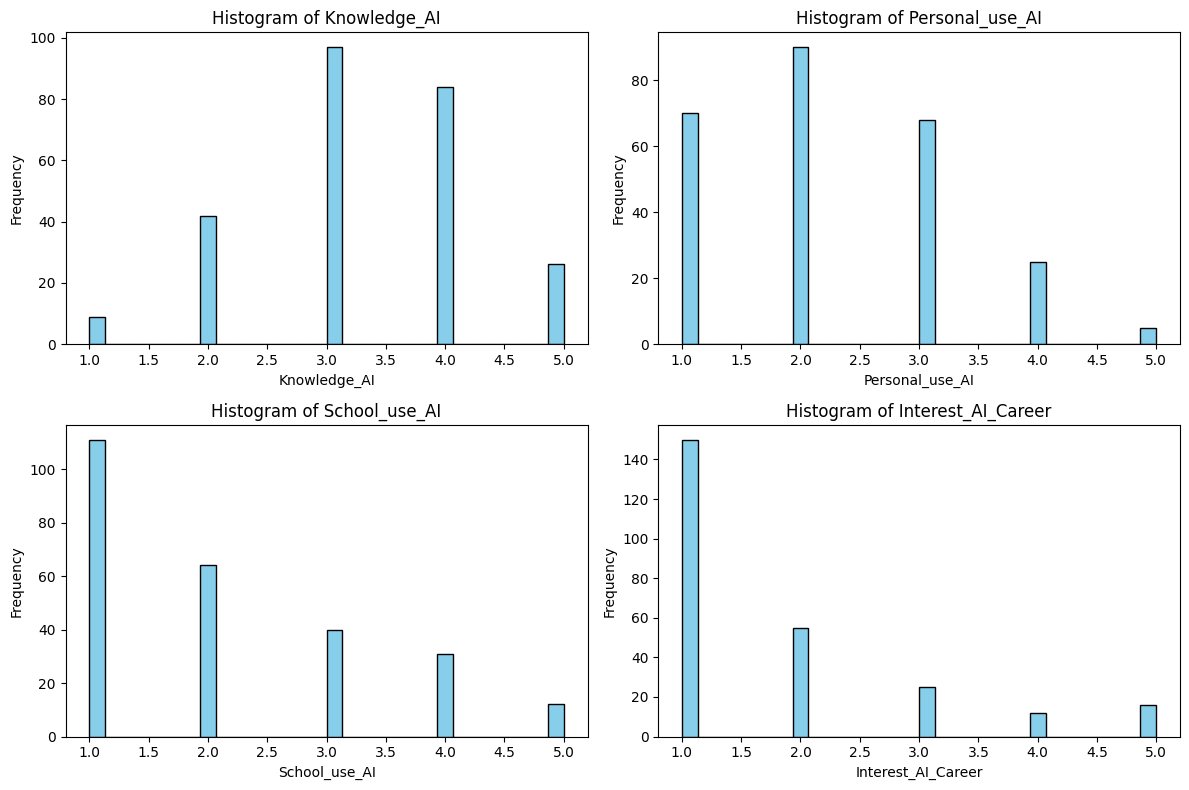

In [365]:
# Vizualizimi sipas tipeve të dhënave
plt.figure(figsize=(12, 8))

# Numerical columns
numerical_columns = ['Knowledge_AI', 'Personal_use_AI', 'School_use_AI', 'Interest_AI_Career']

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    plt.hist(dataset[column], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [366]:
X = dataset[['Knowledge_AI', 'Personal_use_AI', 'School_use_AI', 'Interest_AI_Career']]

# Target variable
y = dataset['Do you know what Chat-GPT is?']

# Splitting the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest Classifier
random_forest_classifier = RandomForestClassifier(random_state=42)
random_forest_classifier.fit(X_train, y_train)

# Predictions on the testing set
y_pred = random_forest_classifier.predict(X_test)

# Evaluate the classifier
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred))

Random Forest Classification Report:
              precision    recall  f1-score   support

          No       0.50      0.33      0.40         6
         Yes       0.92      0.96      0.94        46

    accuracy                           0.88        52
   macro avg       0.71      0.64      0.67        52
weighted avg       0.87      0.88      0.87        52



In [367]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train a Gradient Boosting Classifier
gradient_boosting_classifier = GradientBoostingClassifier(random_state=42)
gradient_boosting_classifier.fit(X_train, y_train)

# Predictions on the testing set
y_pred_gb = gradient_boosting_classifier.predict(X_test)

# Evaluate the classifier
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

          No       0.00      0.00      0.00         6
         Yes       0.88      0.96      0.92        46

    accuracy                           0.85        52
   macro avg       0.44      0.48      0.46        52
weighted avg       0.78      0.85      0.81        52



In [368]:
from sklearn.svm import SVC

# Initialize and train a Support Vector Machine Classifier
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)

# Predictions on the testing set
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the classifier
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

SVM Classification Report:
              precision    recall  f1-score   support

          No       0.00      0.00      0.00         6
         Yes       0.88      1.00      0.94        46

    accuracy                           0.88        52
   macro avg       0.44      0.50      0.47        52
weighted avg       0.78      0.88      0.83        52



c:\Users\hysen\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hysen\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hysen\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [369]:
from sklearn.linear_model import LogisticRegression

# Initialize and train a Logistic Regression Classifier
logistic_regression_classifier = LogisticRegression(max_iter=1000, random_state=42)
logistic_regression_classifier.fit(X_train, y_train)

# Predictions on the testing set
y_pred_lr = logistic_regression_classifier.predict(X_test)

# Evaluate the classifier
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

          No       0.00      0.00      0.00         6
         Yes       0.88      1.00      0.94        46

    accuracy                           0.88        52
   macro avg       0.44      0.50      0.47        52
weighted avg       0.78      0.88      0.83        52



c:\Users\hysen\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hysen\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hysen\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [370]:
from sklearn.naive_bayes import GaussianNB

# Initialize and train a Gaussian Naive Bayes Classifier
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, y_train)

# Predictions on the testing set
y_pred_nb = naive_bayes_classifier.predict(X_test)

# Evaluate the classifier
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))


Naive Bayes Classification Report:
              precision    recall  f1-score   support

          No       0.25      0.17      0.20         6
         Yes       0.90      0.93      0.91        46

    accuracy                           0.85        52
   macro avg       0.57      0.55      0.56        52
weighted avg       0.82      0.85      0.83        52



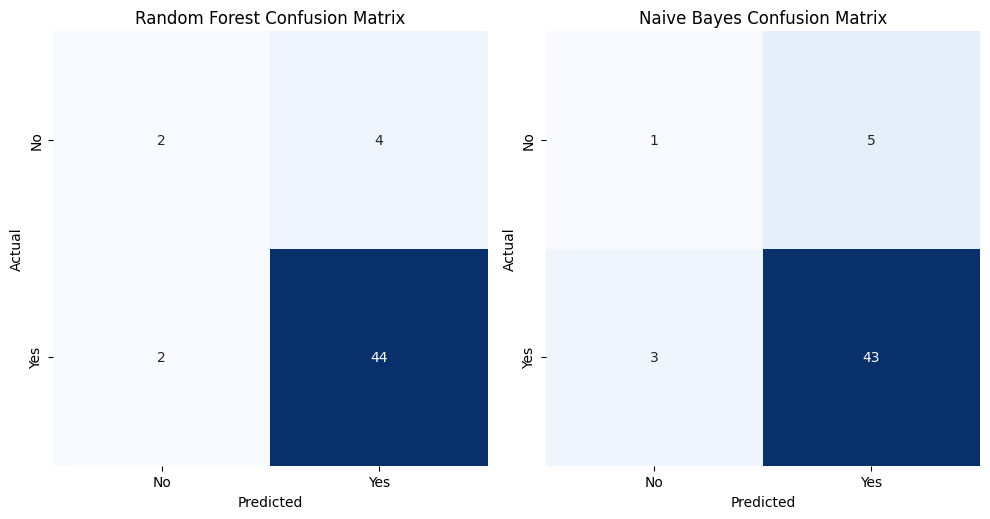

In [371]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrices
cm_rf = confusion_matrix(y_test, y_pred)
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Plot confusion matrix for Random Forest
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", cbar=False, square=True, xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Plot confusion matrix for Naive Bayes
plt.subplot(1, 2, 2)
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues", cbar=False, square=True, xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()
